# An Introduction of Xarray in Atomspheric Sience

The modules and Python version and the data used in this example are as follows:
- **Python:** 3.8.8
- **Matplotlib:** 3.5.0
- **Xarray:** version:**0.20.1** can be installed via `conda` by typing `conda install -c conda-forge xarray dask netCDF4 bottleneck` in terminal.The website of Xarray is [here](http://xarray.pydata.org/en/stable/index.html)
- **GPCP Data:** Global Precipitation Climatology Project monthly precipitation dataset from 1979-present combines observations and satellite precipitation data into 2.5°x2.5° global grids. It can be downloaded from [here](https://psl.noaa.gov/data/gridded/data.gpcp.html)

In [1]:
##import the module and prepare the data
import xarray as xr
import matplotlib.pyplot as plt
GPCP_path = 'precip.mon.mean.nc'

## Read the GPCP data via Xarray
The most common way to read the netcdf4 file is `xarray.open_dataset()` function.It is only require one parameter which is the path(Relative or Absolute) of the file.
<br> We can view the content of the netcdf4 file simply by `print()`


In [2]:
data = xr.open_dataset(GPCP_path)
print(data)

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 510, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-06-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...         

We can select the specific time or area of data by using the method `sel(),isel()`. For example, The time span of GPCP file is from 1979-01 to 2021-06(monthly data),we can specify the time span by `sel()`,or we can selet the data in Northern Hemisphere etc...
- `sel()`Return a new DataArray whose data is given by selecting index labels along the specified dimension(s).
- `isel()`Return a new DataArray whose data is given by integer indexing along the specified dimensio(s)  


In [3]:
## read the data from 1979 to 1980
xr.open_dataset(GPCP_path).sel(time = slice('1979','1980'))
## read the first time in data
xr.open_dataset(GPCP_path).isel(time = 0)
## read the Northern Hemisphere only
xr.open_dataset(GPCP_path).sel(lat = slice(0,90))

<xarray.Dataset>
Dimensions:    (lat: 36, lon: 144, time: 510, nv: 2)
Coordinates:
  * lat        (lat) float32 1.25 3.75 6.25 8.75 ... 81.25 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-06-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2021/05 through latest.

In many cases, there are more than one variables in the nc(netcdf4) file, for example the GPCP data contains four variables: time_bnds, lat_bnds, lon_bnds and precip. We can select the variable by `.variable_name` or `['variable_name']`.

In [4]:
#### select the precip 
data.precip # data['precip']

<xarray.DataArray 'precip' (time: 510, lat: 72, lon: 144)>
[5287680 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-06-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [0.0000000e+00 2.3604587e+37]

## Calculation via Xarray
The xarray provide a lot of calculation method including:`mean(),std(),var()`etc....., and there are some useful method like `groupby(),resample(),rollling()`etc... for us to conveniently calculate the Climatological Mean(Seasonal or Annual), Seasonal mean for each year,Anomoly, Sliding Average,etc....

### 1) Climatological State
By the way, you can view the data simply by `plot()` method.

Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'


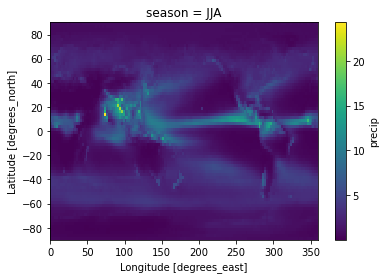

In [5]:
### Climatological State
pre_cli = data.mean(dim = 'time')
### Climatological Mean(Seasonal)
pre_season = data.groupby('time.season').mean()
print(pre_season.coords)
### Visualize The JJA Mean
pre_season.precip.sel(season = 'JJA').plot()

### 2) Seasonal mean of each year
Calculate the seasonal mean of each year. There are two methods:
- **resample**
- **groubpy**

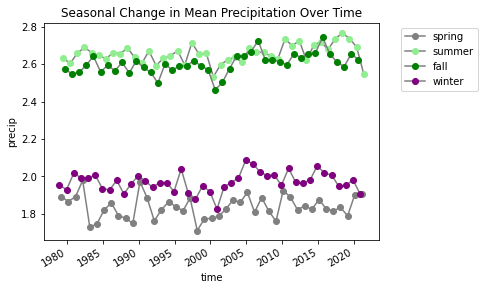

In [6]:
### The first method (resample)
cali_seasonal_mean = data.precip.sel(lat = slice(0,90)).resample(time='QS-DEC').mean(keep_attrs=True).mean(dim = ["lon","lat"])
colors = {3: "grey", 6: "lightgreen", 9: "green", 12: "purple"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}
f, ax = plt.subplots()
for month, arr in cali_seasonal_mean.groupby('time.month'):
    arr.plot(ax=ax,color="grey", marker="o",markerfacecolor=colors[month],markeredgecolor=colors[month],label=seasons[month])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="Seasonal Change in Mean Precipitation Over Time")
plt.show()

Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021


[Text(0.5, 1.0, 'Seasonal Change in Mean Precipitation of Northern Hemisphere Over Time')]

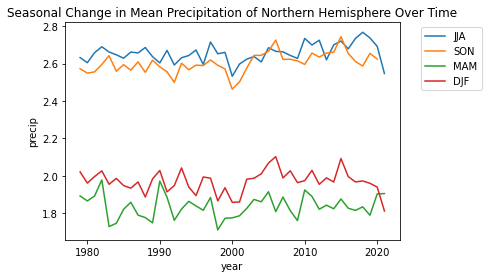

In [7]:
### The Second method (groupby)
f, ax = plt.subplots()
for season in ["JJA","SON","MAM","DJF"]:
    cali_seasonal_mean = data.precip.sel(lat = slice(0,90)).groupby("time.season")[season].groupby('time.year').mean().mean(dim = ['lon','lat'])
    cali_seasonal_mean.plot(ax=ax,label=season)
    print(cali_seasonal_mean.coords)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="Seasonal Change in Mean Precipitation of Northern Hemisphere Over Time")

### 3) Anomaly
The anomaly is define as <font color='red'>$x^{\prime} = x - \bar{x}$</font>.For example: The anomaly for January 1979 is computed by subtracting the average data for all Januaries from the observed monthly data.

Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-06-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 8 9 10 11 12 1 2 3 4 5 6


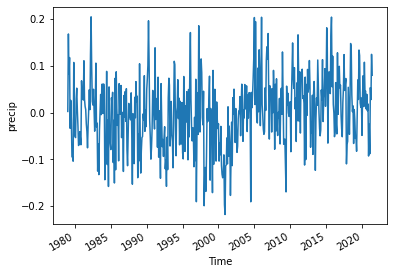

In [8]:
### Calculate the Anomoly for each month
pre_ano = (data.precip.groupby("time.month") - data.precip.groupby("time.month").mean())
pre_ano.sel(lat = slice(0,90)).mean(dim = ['lat','lon']).plot()
print(pre_ano.coords)